## import ##

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

import openslide
from openslide import OpenSlide, OpenSlideError
from torch.utils.data import DataLoader

import sys
sys.path.append("/workspace")
import WBC_loader
import time

In [6]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA RTX A6000'

## Implementation of dataloader ##

### EPI 20x ###

In [15]:
slide_path = "/workspace/2024_05_27__1138-04.tif"

In [8]:
start = time.time()
cropped_dataset = WBC_loader.SmearDatasetQC(slide_path=slide_path,h=1024,w=1024,extra_padding=64,x_start=30000,x_end=40000,y_start=70000,y_end=80000,qc=True, wbc_qc=False)
cropped_dataloader = DataLoader(cropped_dataset, batch_size=16, shuffle=False)
end = time.time()
print(end - start)  

Total Patches: 100
Final Patches (passed QC): 50
5.4088521003723145


In [16]:
start = time.time()
cropped_dataset = WBC_loader.SmearDatasetQC(slide_path=slide_path,h=1024,w=1024,extra_padding=128,x_start=30000,x_end=40000,y_start=70000,y_end=80000,qc=True, wbc_qc=True)
cropped_dataloader = DataLoader(cropped_dataset, batch_size=16, shuffle=False)
end = time.time()
print(end - start)  

Total Patches: 100
Total number of WBC detected: 51
18.966948986053467


#### Confirmation of extracted WBC images ####

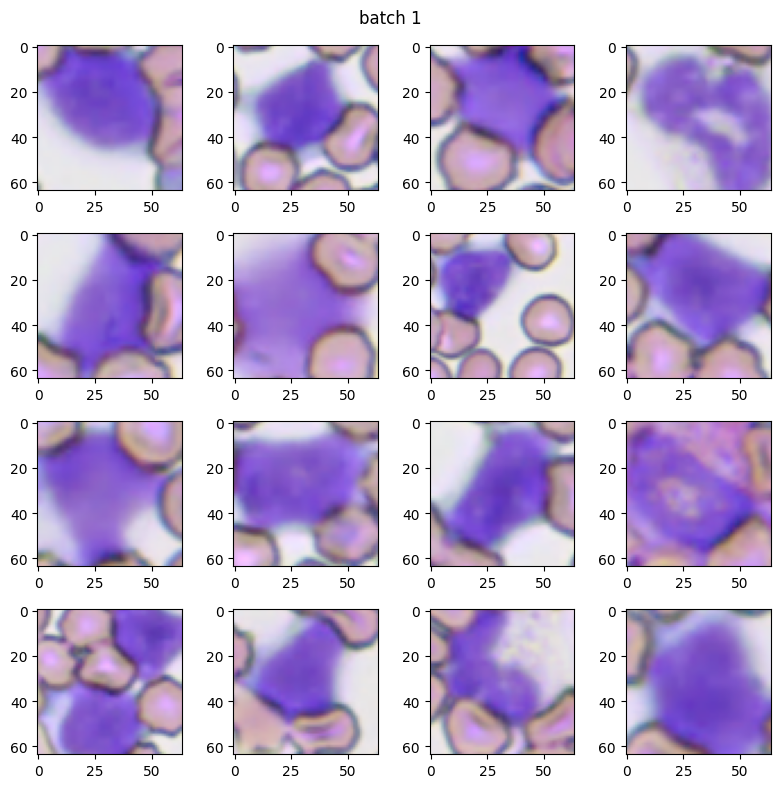

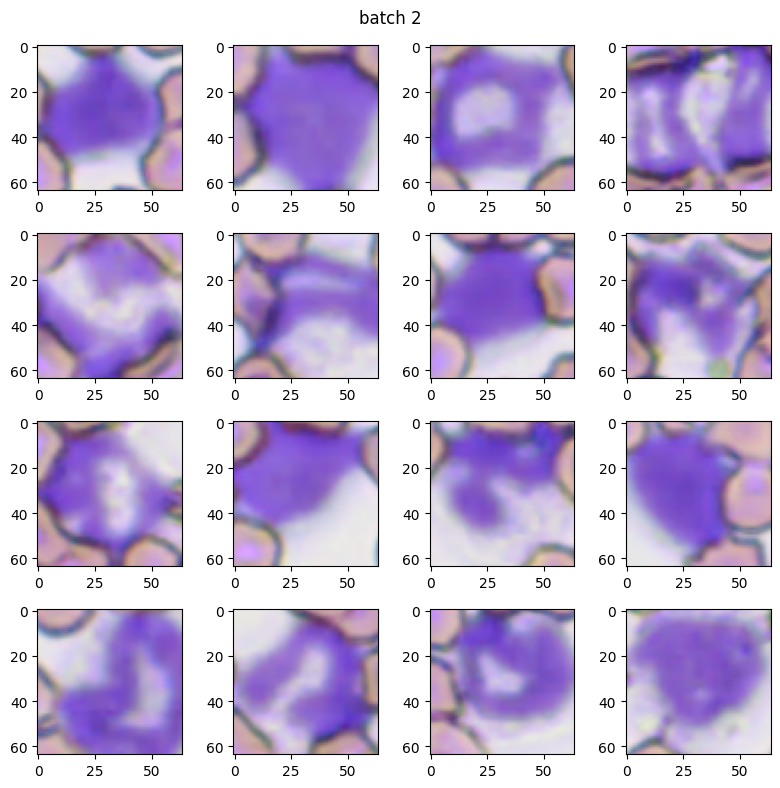

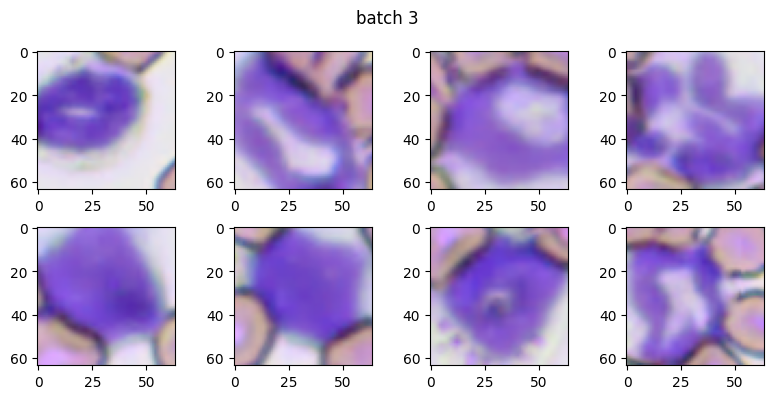

In [17]:
for i, (img,coords) in enumerate(cropped_dataloader):
    fig = plt.figure(figsize=(8, 2*(((len(img)-1)//4)+1)))
    for n in range(len(img)):
        ax = fig.add_subplot((((len(img)-1)//4)+1), 4, n+1)
        ax.imshow(img[n])
    fig.suptitle("batch "+ str(i+1))
    plt.tight_layout()
    plt.show()

### EPI 50x ###

In [11]:
slide_path = "/workspace/2024_07_25__TKD282-epi50_test.tif"

In [12]:
start = time.time()
cropped_dataset = WBC_loader.SmearDatasetQC(slide_path=slide_path,h=1024*4,w=1024*4,extra_padding=128*4,x_start=30000,x_end=40000,y_start=80000,y_end=120000,size=40,wbc_resize=(256, 256),qc=True,wbc_qc=True)
cropped_dataloader = DataLoader(cropped_dataset, batch_size=16, shuffle=False)
end = time.time()
print(end - start)

Total Patches: 30
Total number of WBC detected: 19
179.5014100074768


#### Confirmation of extracted WBC images ####

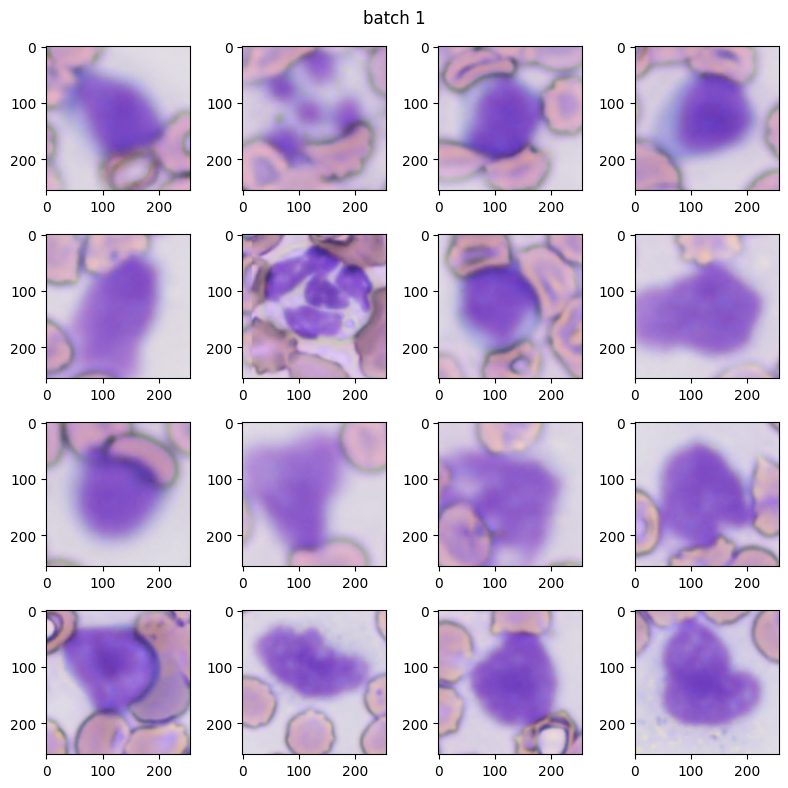

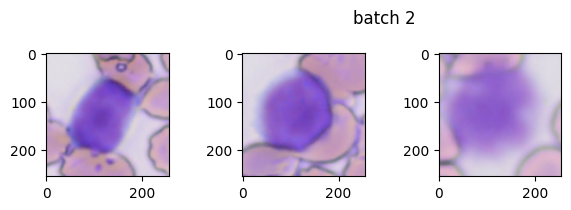

In [14]:
for i, (img,coords) in enumerate(cropped_dataloader):
    fig = plt.figure(figsize=(8, 2*(((len(img)-1)//4)+1)))
    for n in range(len(img)):
        ax = fig.add_subplot((((len(img)-1)//4)+1), 4, n+1)
        ax.imshow(img[n])
    fig.suptitle("batch "+ str(i+1))
    plt.tight_layout()
    plt.show()

#### Computation time at WSI ###

In [19]:
slide_path = "/workspace/2024_07_25__TKD282-epi50_test.tif"
wsi = OpenSlide(slide_path)
wsi.dimensions

(56544, 216122)

In [20]:
start = time.time()
cropped_dataset = WBC_loader.SmearDatasetQC(slide_path=slide_path,h=1024*4,w=1024*4,extra_padding=128*4,x_start=1000,x_end=55000,y_start=1000,y_end=215000,size=40,wbc_resize=(256, 256),qc=True,wbc_qc=True)
cropped_dataloader = DataLoader(cropped_dataset, batch_size=16, shuffle=False)
end = time.time()
print(end - start)

Total Patches: 742
Total number of WBC detected: 514
3374.158900499344
